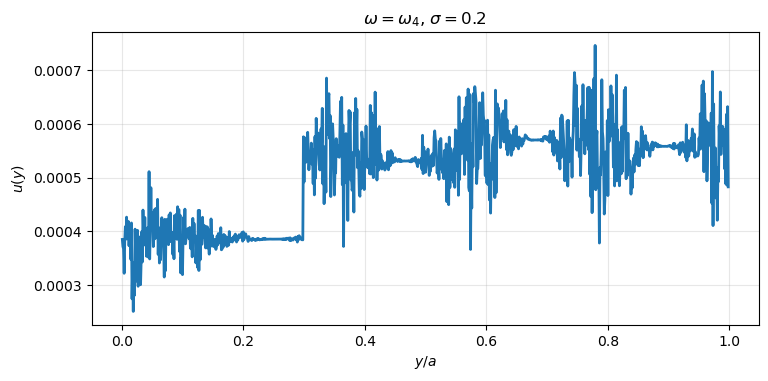

In [35]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

a    = 1.0
dA   = 0.30 * a
nA, nB = 1.5, 3.5
epsA, epsB = nA**2, nB**2

N  = 1000
y  = np.linspace(0.0, a, N, endpoint=False)
dy = a / N

eps_base = np.where(y < dA, epsA, epsB).astype(float)
rng = np.random.default_rng(7)
sigma_rel = 0.2
eps = eps_base * (1.0 + sigma_rel * rng.normal(size=N))
ainv = 1.0 / eps

def Matrix(N, dy, ainv):
    A = np.zeros((N, N), dtype=complex)
    a_half = 2*ainv[:-1]*ainv[1:] / (ainv[:-1]+ainv[1:]) 
    for i in range(1, N-1):
        A[i,i]   = (a_half[i-1] + a_half[i]) / (dy**2)
        A[i,i-1] = -a_half[i-1] / (dy**2)
        A[i,i+1] = -a_half[i]   / (dy**2)
    A[0,0]   = 1.0e12
    A[-1,-1] = 1.0e12
    return A

def derivative(H, dy):
    d = np.zeros_like(H, dtype=complex)
    d[1:-1] = (H[2:] - H[:-2]) / (2.0*dy)
    return d

A = Matrix(N, dy, ainv)
w2, V = la.eigh(A)          
idx = np.argsort(w2)
w2 = w2[idx]; V = V[:, idx]

band_index = 3                 
omega = np.sqrt(w2)            
Hx = V[:, band_index]       

dHdy = derivative(Hx, dy)
Ez = np.zeros_like(Hx, dtype=complex)
Ez[1:-1] = dHdy[1:-1] / (1j * omega[band_index] * eps[1:-1])

u_energy = 0.25*(eps*np.abs(Ez)**2 + np.abs(Hx)**2) 

plt.figure(figsize=(8.6, 3.8))
plt.plot(y[1:-1]/a, u_energy[1:-1], lw=2.0)
plt.xlabel(r"$y/a$")
plt.ylabel(r"$u(y)$")
plt.title(rf"$\omega=\omega_4$, $\sigma={sigma_rel}$")
plt.grid(True, alpha=0.3)
plt.show()
